# Loan Prediction 

The loan prediction dataset is dataset collected from the insurance companies. The dataset is obtain from the Analytics Vidhya website. The dataset contain 13 Variables.

Problem Statement:
  - Predict if a loan will get approved or not.

In [28]:
#Imports 

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline

In [4]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train.shape

(614, 13)

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [10]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# visualizing the data for better understanding

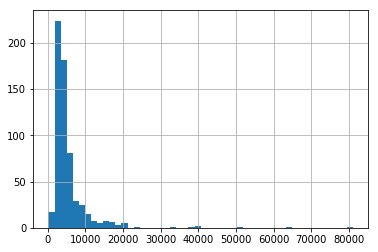

In [13]:
train['ApplicantIncome'].hist(bins=50)

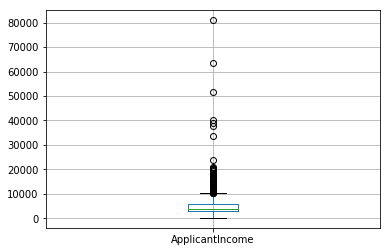

In [15]:
train.boxplot(column='ApplicantIncome')

the box plots clearly show that there are many outliers in the ApplicantIncome

C:\Users\Aniket\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


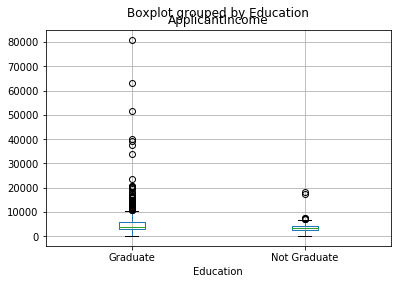

In [16]:
train.boxplot(column='ApplicantIncome', by = 'Education')

C:\Users\Aniket\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


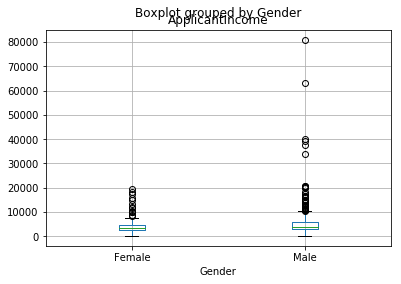

In [17]:
train.boxplot(column='ApplicantIncome', by = 'Gender')

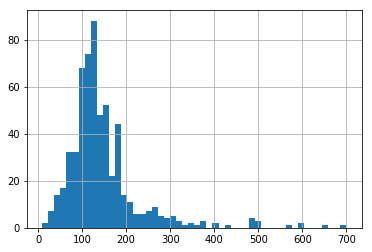

In [18]:
train['LoanAmount'].hist(bins=50)

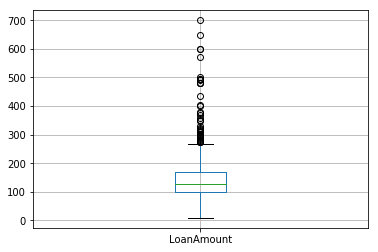

In [19]:
train.boxplot(column='LoanAmount')

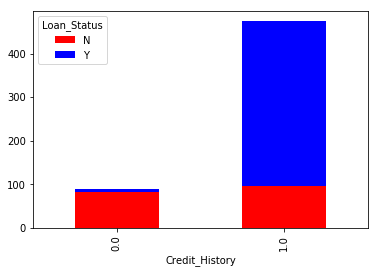

In [20]:
temp3 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Above diagram shows that there is more probability that the person will get the loan if person has the credit History

# Dealing with the missing values


In [22]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
 train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

In [31]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

So,We will replace the missing values in Self_Employed to no.

In [32]:
 train['Self_Employed'].fillna('No',inplace=True)

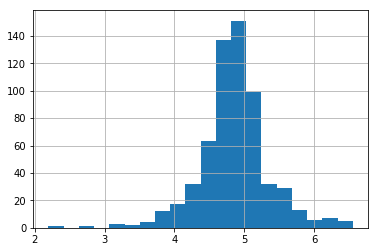

In [33]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

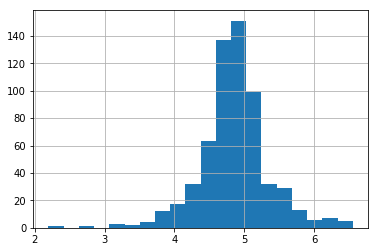

In [34]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['LoanAmount_log'].hist(bins=20)

In [36]:
cat_vbl = {'Gender','Married','Dependents','Self_Employed','Property_Area'}

In [39]:
from sklearn.preprocessing import LabelEncoder
for var in cat_vbl:
    lb = LabelEncoder()
    full_data = pd.concat((train[var],test[var]),axis=0).astype('str')
    lb.fit( full_data )
    train[var] = lb.transform(train[var].astype('str'))
    test[var] = lb.transform(test[var].astype('str'))

In [40]:
train['Credibility'] = train['ApplicantIncome'] / train['LoanAmount']
test['Credibility'] = test['ApplicantIncome'] / test['LoanAmount']



In [52]:
train = train.fillna(value = -999)
test = test.fillna(value = -999)

In [53]:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    model.fit(data[predictors],data[outcome]) 

In [54]:
outcome_var = 'Loan_Status'

predictor_var = ['Credibility',
            'Gender',
            'Married',
            'Dependents',
            'Self_Employed',
            'Property_Area',
            'ApplicantIncome',
            'CoapplicantIncome',
            'LoanAmount',
            'Loan_Amount_Term',
            'Credit_History'
]


### Logistic Regression

In [55]:
model = LogisticRegression()
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 68.893%
Cross-Validation Score : 67.752%


### Decision Tree Classifier

In [57]:
model = DecisionTreeClassifier()

classification_model(model, train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 68.250%


### Random Forest

In [58]:
odel = RandomForestClassifier(n_estimators=100)

classification_model(model, train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 68.413%
